In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.groupby('sex')['survived'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [7]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived', index=['sex',age],columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:
fare = pd.qcut(titanic['fare'],2)

In [11]:
titanic.pivot_table('survived',index=['sex',age], columns=['class',fare])

class                 First                        Second                    \
fare            [0, 14.454] (14.454, 512.329] [0, 14.454] (14.454, 512.329]   
sex    age                                                                    
female (0, 18]          NaN          0.909091    1.000000          1.000000   
       (18, 80]         NaN          0.972973    0.880000          0.914286   
male   (0, 18]          NaN          0.800000    0.000000          0.818182   
       (18, 80]         0.0          0.391304    0.098039          0.030303   

class                 Third                    
fare            [0, 14.454] (14.454, 512.329]  
sex    age                                     
female (0, 18]     0.714286          0.318182  
       (18, 80]    0.444444          0.391304  
male   (0, 18]     0.260870          0.178571  
       (18, 80]    0.125000          0.192308

In [12]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [13]:
births = pd.read_csv('births.csv')

In [14]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [15]:
births['decade'] = 10 * (births['year'] // 10)

In [16]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [17]:
import matplotlib.pyplot as pp
%matplotlib inline
sns.set()

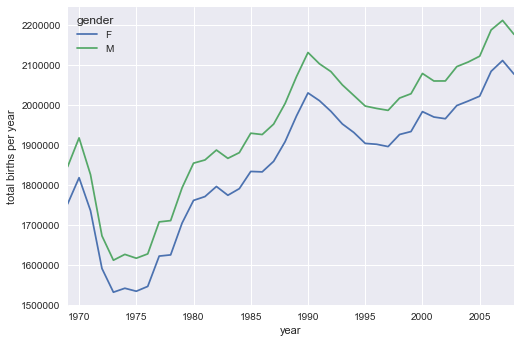

In [18]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
pp.ylabel("total births per year")

In [19]:
quartiles = np.percentile(births['births'], [25,50,75])

In [20]:
quartiles

array([ 4358. ,  4814. ,  5289.5])

In [21]:
mu = quartiles[1]

In [22]:
sig = 0.74 * (quartiles[2]-quartiles[0])
sig

689.30999999999995

In [23]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [24]:
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [25]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [26]:
import matplotlib as mpl

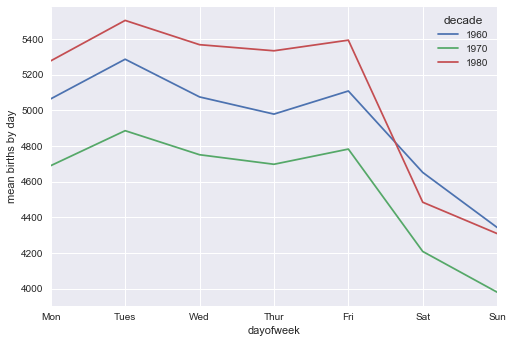

In [27]:
births.pivot_table('births', index='dayofweek',columns='decade',aggfunc='mean').plot()
pp.gca().set_xticklabels(['Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
pp.ylabel('mean births by day')

In [28]:
births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])
births_by_date

1   1     4009.225
    2     4247.400
    3     4500.900
    4     4571.350
    5     4603.625
    6     4668.150
    7     4706.925
    8     4629.650
    9     4537.775
    10    4591.700
    11    4675.150
    12    4700.800
    13    4730.050
    14    4816.200
    15    4733.650
    16    4665.025
    17    4654.650
    18    4707.325
    19    4731.525
    20    4767.525
    21    4790.250
    22    4742.800
    23    4666.750
    24    4653.200
    25    4698.000
    26    4715.900
    27    4747.025
    28    4771.800
    29    4702.300
    30    4644.225
            ...   
12  2     4830.300
    3     4758.500
    4     4718.725
    5     4734.675
    6     4683.050
    7     4704.325
    8     4803.800
    9     4793.825
    10    4785.325
    11    4738.500
    12    4791.300
    13    4676.675
    14    4792.100
    15    4920.800
    16    4968.100
    17    4951.600
    18    4936.375
    19    4962.925
    20    4877.025
    21    4816.100
    22    4661.925
    23    44

In [29]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]

In [30]:
births_by_date

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
2012-01-06    4668.150
2012-01-07    4706.925
2012-01-08    4629.650
2012-01-09    4537.775
2012-01-10    4591.700
2012-01-11    4675.150
2012-01-12    4700.800
2012-01-13    4730.050
2012-01-14    4816.200
2012-01-15    4733.650
2012-01-16    4665.025
2012-01-17    4654.650
2012-01-18    4707.325
2012-01-19    4731.525
2012-01-20    4767.525
2012-01-21    4790.250
2012-01-22    4742.800
2012-01-23    4666.750
2012-01-24    4653.200
2012-01-25    4698.000
2012-01-26    4715.900
2012-01-27    4747.025
2012-01-28    4771.800
2012-01-29    4702.300
2012-01-30    4644.225
                ...   
2012-12-02    4830.300
2012-12-03    4758.500
2012-12-04    4718.725
2012-12-05    4734.675
2012-12-06    4683.050
2012-12-07    4704.325
2012-12-08    4803.800
2012-12-09    4793.825
2012-12-10    4785.325
2012-12-11    4738.500
2012-12-12    4791.300
2012-12-13    4676.675
2012-12-14 

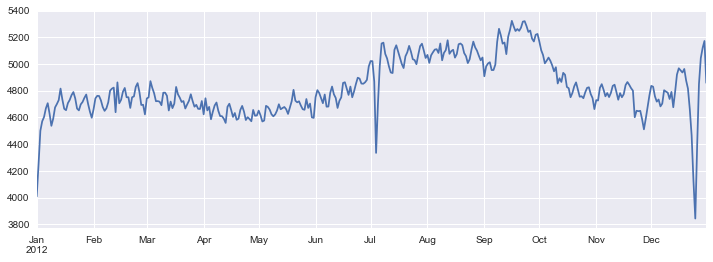

In [31]:
fig,ax = pp.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

In [42]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0     41      0 --:--:-- --:--:-- --:--:--   277


In [49]:
with open('recipeitems-latest.json') as f:
    line = f.readline()

pd.read_json(line).shape

ValueError: Expected object or value

In [47]:
with open('recipeitems-latest.json','r') as f:
    data = (line.strip() for line in f) #extracting each line
    data_json= "[{0}]".format(','.join(data)) #reformat so each line is the element of a list 
recipes = pd.read_json(data_json)

In [48]:
recipes.shape




(0, 0)